<a href="https://colab.research.google.com/github/peoplecallitinsanity/sigmoid_ML01/blob/main/11_Model_Interpretation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install dtreeviz

In [ ]:
pip install imperio

In [ ]:
#importing libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from dtreeviz.trees import *
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

In [ ]:
#importing datasets
heart = pd.read_csv('heart2.csv')
electric = pd.read_csv('measures.csv')

In [ ]:
#cleaning the dataset
heart['Sex'].replace(['M', 'F'],[0, 1], inplace = True)
heart['ExerciseAngina'].replace(['N', 'Y'],[0, 1], inplace = True)
heart['ST_Slope'].replace(['Flat', 'Up', 'Down'],[0, 1, 2], inplace = True)
heart['RestingECG'].replace(['Normal', 'LVH', 'ST'],[0, 1, 2], inplace = True)
heart['ChestPainType'].replace(['ASY', 'NAP', 'ATA','TA'],[0, 1, 2, 3], inplace = True)

In [ ]:
#replacing categorical features with frequency
from imperio import FrequencyImputationTransformer
freq = FrequencyImputationTransformer()
heart = freq.apply(heart, target = 'HeartDisease', columns = ['ChestPainType', 'RestingECG', 'ST_Slope'] )

In [ ]:
heart

Age  Sex  ChestPainType  ...  Oldpeak  ST_Slope  HeartDisease
0    40.0  0.0       0.188453  ...      0.0  0.430283             0
1    49.0  1.0       0.221133  ...      1.0  0.501089             1
2    37.0  0.0       0.188453  ...      0.0  0.430283             0
3    48.0  1.0       0.540305  ...      1.5  0.501089             1
4    54.0  0.0       0.221133  ...      0.0  0.430283             0
..    ...  ...            ...  ...      ...       ...           ...
913  45.0  0.0       0.050109  ...      1.2  0.501089             1
914  68.0  0.0       0.540305  ...      3.4  0.501089             1
915  57.0  0.0       0.540305  ...      1.2  0.501089             1
916  57.0  1.0       0.188453  ...      0.0  0.501089             1
917  38.0  0.0       0.221133  ...      0.0  0.430283             0

[918 rows x 12 columns]

In [ ]:
#defining x and y vector for heart dataset
X1 = heart.iloc[:, :-1].values
y1 = heart['HeartDisease'].values

In [ ]:
#splitting data in test and train
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 42)

In [ ]:
#defining the model, applying the fit method
clf = DecisionTreeClassifier()
clf.fit(X_train1, y_train1)
y_pred1 = clf.predict(X_test1)

In [ ]:
#Creating the tree visualization
viz = dtreeviz(clf, x_data = X1, y_data = y1, target_name = 'HeartDisease', feature_names = heart.columns, class_names = ['Negative', 'Positive'], title = 'Decision Tree - Heart dataset')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont:

In [ ]:
viz

In [ ]:
electric

u_q    coolant  stator_winding  ...    ambient    torque  profile_id
0      -0.450682  18.805172       19.086670  ...  19.850691  0.187101        17.0
1      -0.325737  18.818571       19.092390  ...  19.850672  0.245417        17.0
2      -0.440864  18.828770       19.089380  ...  19.850657  0.176615        17.0
3      -0.327026  18.835567       19.083031  ...  19.850647  0.238303        17.0
4      -0.471150  18.857033       19.082525  ...  19.850639  0.208197        17.0
...          ...        ...             ...  ...        ...       ...         ...
28109  50.001839  19.182383       22.054464  ...  23.242899  0.192261         5.0
28110  49.997669  19.196394       22.062147  ...  23.233206  0.188836         5.0
28111  50.007954  19.171013       22.105967  ...  23.239384  0.191715         5.0
28112  50.028343  19.096292       22.121075  ...  23.245535  0.189746         5.0
28113  50.011482  19.034031       22.106777  ...  23.246590  0.194690         5.0

[28114 rows x 13 columns]

In [ ]:
#defining x and y vector for electric motor dataset
X2 = electric.iloc[:, :-2].values
y2 = electric['torque'].values

In [ ]:
#splitting data in test and train
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state = 42)

In [ ]:
electric.dropna(inplace = True)

In [ ]:
model = LinearRegression()
model.fit(X_train2,y_train2)

LinearRegression()

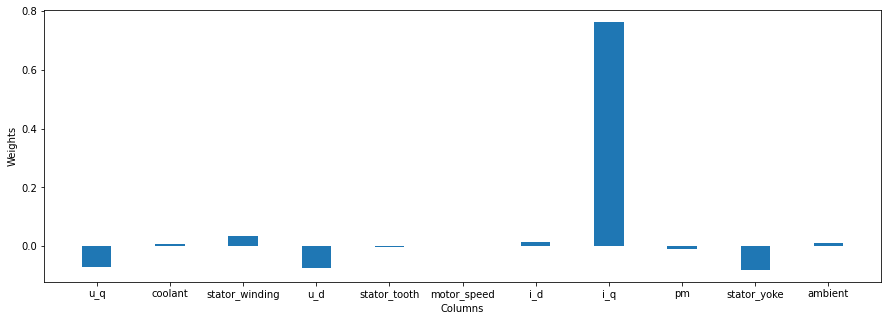

In [ ]:
#plotting the weights
fig = plt.figure(figsize = (15, 5))
columns = ['u_q', 'coolant', 'stator_winding', 'u_d', 'stator_tooth',
       'motor_speed', 'i_d', 'i_q', 'pm', 'stator_yoke', 'ambient']
plt.bar(columns, model.coef_, width = 0.4)
 
plt.xlabel("Columns")
plt.ylabel("Weights")
plt.show()

## The i_q column has the highest importance on prediction - as it has a 0.8 absolute value of weights, while motor_speed has no influence and stator_tooth has a lower importance

In [ ]:
#empty lists for metricx
MSE = []
MAE = []
RMSE = []

In [ ]:
#a function to train on multiple models
def train(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    MSE.append(mean_squared_error(y_pred, y_test))
    MAE.append(mean_absolute_error(y_pred, y_test))
    RMSE.append(np.sqrt(mean_squared_error(y_pred, y_test)))

In [ ]:
#itterating through the models, training and getting the metrics scores
for model in [LinearRegression(), KNeighborsRegressor(), RandomForestRegressor(), DecisionTreeRegressor() ]:
    train(model, X_train2, y_train2, X_test2, y_test2)

In [ ]:
#creating the dataframe with the results for regression
df1 = pd.DataFrame(columns = ['Estimator', 'MSE', 'MAE', 'RMSE'])
df1['Estimator'] = ['LinearRegression()', 'KNeighborsRegressor()', 'RandomForestRegressor()', 'DecisionTreeRegressor()' ]
df1['MSE'] = MSE
df1['MAE'] = MAE
df1['RMSE'] = RMSE

In [ ]:
df1

Estimator       MSE       MAE      RMSE
0       LinearRegression()  0.134785  0.074501  0.367130
1    KNeighborsRegressor()  0.174182  0.044866  0.417351
2  RandomForestRegressor()  0.459891  0.049183  0.678153
3  DecisionTreeRegressor()  0.093335  0.051716  0.305507

## Overall, Decision Tree Regressor has the lowest errors score from all of the other model, getting a really good score ~ 0

In [ ]:
#installing lime
!pip install lime

In [ ]:
#importing lime_tabular
from lime import lime_tabular

In [ ]:
#defining the regression model, applying the fit method
model = DecisionTreeRegressor()
model.fit(X_train2, y_train2)


DecisionTreeRegressor()

In [ ]:
columns

['u_q',
 'coolant',
 'stator_winding',
 'u_d',
 'stator_tooth',
 'motor_speed',
 'i_d',
 'i_q',
 'pm',
 'stator_yoke',
 'ambient']

In [ ]:
#explanation using lime_tabular
explainer = lime_tabular.LimeTabularExplainer(X_train2,
                                              feature_names = list(electric.iloc[:, :-1].columns),
                                              class_names = columns,
                                              verbose = True, mode = 'regression')

In [ ]:
#visualizing the explanation
exp = explainer.explain_instance(X_test2[2], model.predict)

Intercept 43.20876800087655
Prediction_local [0.83157814]
Right: -0.5863884687423706


In [ ]:
#plotting explanation
exp.show_in_notebook(show_table = True, show_all = False)

## The most informative column from this dataset is i_q with 43.50 value and it brings the prediction to negative class. Also, we have the most of the features influencing the prediction to the positive class (and i dont know what and if something went wrong )

In [ ]:
#empty lists for classification model metrics
ACC = []
REC = []
PRE = []
F1 = []

In [ ]:
#function to train the models with
def train2(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    ACC.append(accuracy_score(y_pred, y_test))
    REC.append(recall_score(y_pred, y_test))
    PRE.append(precision_score(y_pred, y_test))
    F1.append(f1_score(y_pred, y_test))

In [ ]:
#iteratting through the models and training, getting the metrics scores
for model in [LogisticRegression(), GaussianNB(),RandomForestClassifier(),KNeighborsClassifier(), DecisionTreeClassifier(), BernoulliNB() ]:
    train2(model, X_train1, y_train1, X_test1, y_test1)

In [ ]:
ACC,REC,PRE,F1

In [ ]:
#creating the dataframe with the results for classification
df = pd.DataFrame(columns = ['Estimator', 'Accuracy', 'Precision', 'Recall', 'F1'])

In [ ]:
df['Accuracy'] = ACC
df['Precision'] = PRE
df['Recall'] = REC
df['F1'] = F1

In [ ]:
df['Estimator'] = ['LogisticRegression()', 'GaussianNB()','RandomForestClassifier()','KNeighborsClassifier()', 'DecisionTreeClassifier()', 'BernoulliNB()' ]

In [ ]:
df

Estimator  Accuracy  Precision    Recall        F1
0      LogisticRegression()  0.836957   0.835366  0.883871  0.858934
1              GaussianNB()  0.865942   0.853659  0.915033  0.883281
2  RandomForestClassifier()  0.876812   0.878049  0.911392  0.894410
3    KNeighborsClassifier()  0.717391   0.743902  0.772152  0.757764
4  DecisionTreeClassifier()  0.778986   0.743902  0.865248  0.800000
5             BernoulliNB()  0.782609   0.786585  0.837662  0.811321

## This time, Random Forest Classifier and Gaussian NB have a close scores- the best from the other models. Variating a little bit on precision and accuracy

In [ ]:
pip install shap

In [ ]:
#importing shap
import shap
shap.initjs()

In [ ]:
#creating the explainer
model = RandomForestClassifier()
model.fit(X_train1, y_train1)
explainer = shap.Explainer(model.predict, X_train1, feature_names=list(heart.columns)[: -1])

In [ ]:
#getting shap values
shap_values = explainer(X_test1)

Permutation explainer:  91%|█████████▏| 252/276 [02:51<00:16,  1.49it/s]

## We can observe from this bar plot, the influence of each feature on the prediction, the highest and the most detached from the other ones is ST_Slope


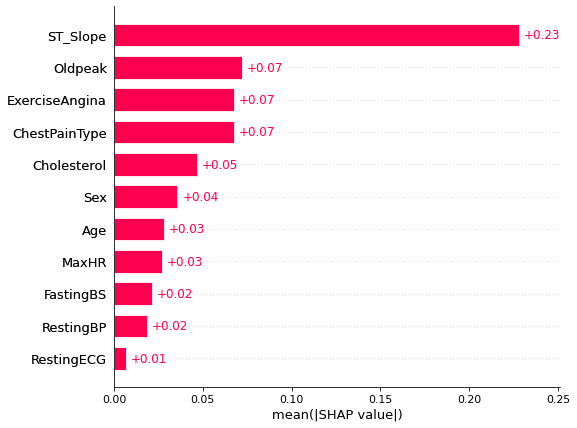

In [ ]:
#plotting shap bar
shap.plots.bar(shap_values, max_display = 14)

## Waterfall plot shows us how each feature influences the class prediction,for example as Age has a +0.02 influence on heart disease, having a highest ST_Slope value, it decreases the chance of a heart disease
## RestingECG and RestingBP has no influence for any of the cases

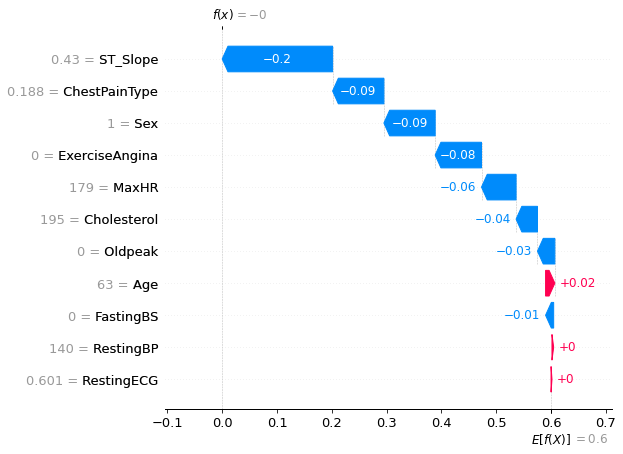

In [ ]:
#plotting shap waterfall
shap.plots.waterfall(shap_values[0], max_display = 14)

## From beeswarm plot we can see the features in their importance order and the feature values dependance on model output - for example a low value of Sex (Masculine - 0)  has a positive impact on model output - so males have a higher chance of having a heart disease. Also we can see that if exercices induced angina on pacient, the pacient is probably having a heart disease too. 

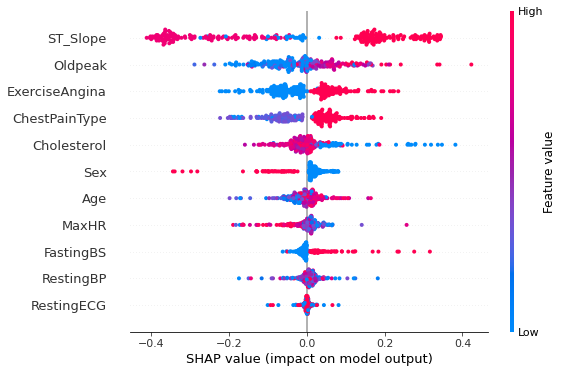

In [ ]:
#plotting shap beeswarm
shap.plots.beeswarm(shap_values, max_display=14)

In [ ]:
#plotting force_plot
shap.force_plot(shap_values[0], X_test1[0])